In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from itertools import chain

In [2]:
train_datagen_nor = ImageDataGenerator(validation_split=0.15,
        rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)




train_data = train_datagen_nor.flow_from_directory(r'D:\Uni-passau\thesis-smalldataset\dataset-50\train',target_size=(512, 512), 
                                                       subset='training',batch_size=32, class_mode='categorical')
valid_data = train_datagen_nor.flow_from_directory(r'D:\Uni-passau\thesis-smalldataset\dataset-50\train',target_size=(512, 512), 
                                                       subset='validation',batch_size=64, class_mode='categorical')




Found 3284 images belonging to 50 classes.
Found 564 images belonging to 50 classes.


In [3]:
import keras.backend as k
import numpy as np
import random
seed = 123
random.seed(seed)
np.random.seed(seed)

In [3]:
from keras.regularizers import l2
from keras.layers import BatchNormalization
from keras.layers import GaussianNoise
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters = 8, kernel_size = (5,5), kernel_regularizer=l2(0.0001), padding = 'Same', activation ='relu', input_shape = (512,512,3)))
model.add(tf.keras.layers.Conv2D(filters = 48, kernel_size = (5,5), kernel_regularizer=l2(0.0001), padding = 'Same', activation ='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides = 2))
model.add(tf.keras.layers.Conv2D(filters = 128, kernel_size = (5,5),kernel_regularizer=l2(0.0001), padding = 'Same', activation ='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides= 2))
model.add(tf.keras.layers.Conv2D(filters = 192, kernel_size = (3,3), kernel_regularizer=l2(0.0001), padding = 'Same', activation ='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides= 2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation = "relu", kernel_regularizer=l2(0.0001)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(128, activation = "relu", kernel_regularizer=l2(0.0001)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(50, activation = "softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 512, 512, 8)       608       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 512, 512, 48)      9648      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 256, 256, 48)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 256, 128)     153728    
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 128)     512       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 128, 128)     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 192)     2

In [4]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import CSVLogger

csv = CSVLogger("/content/drive/MyDrive/dataset-50/gaussian-50/gaussain-50-model_history_log(normal).csv", append=True)
es1= tf.keras.callbacks.EarlyStopping( monitor='val_accuracy',patience=4, restore_best_weights=True)
mc = ModelCheckpoint('/content/drive/MyDrive/dataset-50/gaussian-50/gaussain 50-cnnmodel.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [4]:
adam = tf.keras.optimizers.Adam(learning_rate = 0.01, decay = 0.9)
model.compile(optimizer = adam, loss = "categorical_crossentropy", metrics = ["accuracy"])

In [8]:
history = model.fit(train_data,epochs=30,shuffle=True,validation_data=valid_data,callbacks=[csv,es1,mc])

Epoch 1/30
100/100 [==============================] - 2199s 22s/step - loss: 10.5004 - accuracy: 0.2497 - val_loss: 27.8525 - val_accuracy: 0.0400

Epoch 00001: val_accuracy improved from -inf to 0.04000, saving model to /content/drive/MyDrive/dataset-50/gaussian-50/gaussain 50-cnnmodel.h5
Epoch 2/30
100/100 [==============================] - 176s 2s/step - loss: 9.7496 - accuracy: 0.5800 - val_loss: 12.9216 - val_accuracy: 0.0618

Epoch 00002: val_accuracy improved from 0.04000 to 0.06182, saving model to /content/drive/MyDrive/dataset-50/gaussian-50/gaussain 50-cnnmodel.h5
Epoch 3/30
100/100 [==============================] - 172s 2s/step - loss: 9.2634 - accuracy: 0.7513 - val_loss: 10.1640 - val_accuracy: 0.2782

Epoch 00003: val_accuracy improved from 0.06182 to 0.27818, saving model to /content/drive/MyDrive/dataset-50/gaussian-50/gaussain 50-cnnmodel.h5
Epoch 4/30
100/100 [==============================] - 178s 2s/step - loss: 8.9657 - accuracy: 0.8175 - val_loss: 8.8971 - val_a

In [5]:
model.load_weights(r'D:\Uni-passau\thesis-results\50-dataset\gaussian-cnn\cnn_noise_dataset-50_weights1.h5')

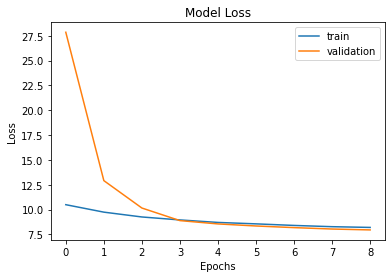

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.savefig('/content/drive/MyDrive/dataset-50/gaussian-50/cnn-gaussain-loss.png')
plt.show()

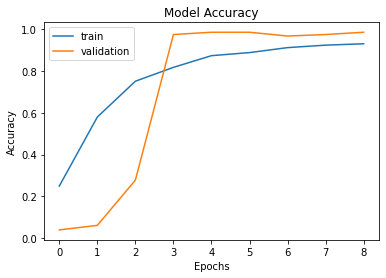

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.savefig('/content/drive/MyDrive/dataset-50/gaussian-50/cnn-gaussain-accuracy.png')
plt.show()

In [6]:
test_datagen_nor = ImageDataGenerator(rescale=1./255)
test_datagen_aug =  ImageDataGenerator(width_shift_range=0.15,
        height_shift_range=0.15,
        horizontal_flip=True,rotation_range=10,
        rescale=1./255)

In [10]:
train_acc=model.evaluate(train_data)
val_acc = model.evaluate(valid_data)
print("Train_Accuracy: %.2f%%" % (train_acc[1]*100))
print("valid_Accuracy: %.2f%%" % (val_acc[1]*100))

9/9 [==============================] - 23s 3s/step - loss: 8.5640 - accuracy: 0.9855
Train_Accuracy: 98.31%
valid_Accuracy: 98.55%


In [ ]:
## gaussian noise

In [14]:
test_genrator_gau = test_datagen.flow_from_directory( r'/content/drive/MyDrive/dataset-50/gaussian-50/test',
        target_size=(512, 512),
        batch_size=32,
        class_mode='categorical')
test_acc = model.evaluate(test_genrator_gau, verbose=0)
print("Test_Accuracy: %.2f%%" % (test_acc[1]*100))

Found 1300 images belonging to 50 classes.
Test_Accuracy: 98.54%


In [19]:
test_genrator = test_datagen.flow_from_directory( r'D:\Uni-passau\thesis-smalldataset\dataset-50\test',
        target_size=(512, 512),
        batch_size=100,
        class_mode='categorical')

Found 1300 images belonging to 50 classes.


In [20]:
x_test =[]
y_test =[]
len = int(1300/100)
print(len)
for i in range(len):
  x,y = next(test_genrator)
  x_test.append(x)
  y_test.append(y)

13


In [21]:
import numpy as np
X_test =np.array(x_test)
Y_test = np.array(y_test)
print(Y_test.shape,X_test.shape)

(13, 100, 50) (13, 100, 512, 512, 3)


In [22]:
import numpy as np
n,batches,hei,wid,col=np.array(x_test).shape
X=np.array(x_test).reshape(n*batches,hei,wid,col)
x,y,z=np.array(y_test).shape
Y =np.array(y_test).reshape(x*y,z)
print(Y.shape,X.shape)

(1300, 50) (1300, 512, 512, 3)


In [ ]:
Y_pred = model.predict(X)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_classes = np.argmax(Y,axis = 1)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_classes, Y_pred_classes))

In [ ]:
## gaussian noise augumentation

In [19]:
test_datagen1 = ImageDataGenerator(width_shift_range=0.15,
        height_shift_range=0.15,
        shear_range=0.1,
        zoom_range=0.15,
        horizontal_flip=True,rotation_range=10,vertical_flip=True,
        fill_mode='nearest',rescale=1./255)
test_genrator_gau_aug = test_datagen1.flow_from_directory( r'/content/drive/MyDrive/dataset-50/gaussian-50/test',
        target_size=(512, 512),
        batch_size=32,
        class_mode='categorical')
test_acc = model.evaluate(test_genrator_gau_aug, verbose=0)
print("Test_Accuracy: %.2f%%" % (test_acc[1]*100))

Found 1300 images belonging to 50 classes.
Test_Accuracy: 3.23%


In [ ]:
## normal datset

In [11]:
test_genrator_nor = test_datagen.flow_from_directory( r'D:\Uni-passau\thesis-smalldataset\dataset-50\test',
        target_size=(512, 512),
        batch_size=32,
        class_mode='categorical')
test_acc = model.evaluate(test_genrator_nor)
print("Test_Accuracy: %.2f%%" % (test_acc[1]*100))

Found 1300 images belonging to 50 classes.
41/41 [==============================] - 328s 8s/step - loss: 9.6713 - accuracy: 0.4054
Test_Accuracy: 40.54%


In [ ]:
## salt and pepper

In [21]:
test_datagen2 = ImageDataGenerator(rescale=1./255)

test_genrator_salt = test_datagen2.flow_from_directory( r'/content/drive/MyDrive/dataset-50/saltandpepper',
        target_size=(512, 512),
        batch_size=32,
        class_mode='categorical')
test_acc = model.evaluate(test_genrator_salt, verbose=0)
print("Test_Accuracy: %.2f%%" % (test_acc[1]*100))

Found 1300 images belonging to 50 classes.
Test_Accuracy: 73.85%


In [ ]:
## normal datset with augumentation

In [ ]:
test_genrator_nor_aug = test_datagen_aug.flow_from_directory( r'D:\Uni-passau\thesis-smalldataset\dataset-50\test',
        target_size=(512, 512),
        batch_size=32,
        class_mode='categorical')
test_acc = model.evaluate(test_genrator_nor_aug)
print("Test_Accuracy: %.2f%%" % (test_acc[1]*100))

Found 1300 images belonging to 50 classes.
33/41 [=======================>......] - ETA: 1:08 - loss: 22.3408 - accuracy: 0.0275

In [ ]:
## corrupted - 50

In [25]:
test_datagen3 = ImageDataGenerator(rescale=1./255)

test_genrator_corrupted = test_datagen3.flow_from_directory( r'/content/drive/MyDrive/dataset-50/coorupted resposes',target_size=(512,512),
        batch_size=32,
        class_mode='categorical')
test_acc = model.evaluate(test_genrator_corrupted, verbose=0)
print("Test_Accuracy: %.2f%%" % (test_acc[1]*100))

Found 1898 images belonging to 50 classes.
Test_Accuracy: 1.37%


In [ ]:
## corrupted -20

In [28]:
test_corrupted1= test_datagen3.flow_from_directory( r'/content/drive/MyDrive/dataset-50/corrupted-1/test',
        batch_size=32,target_size=(512,512),
        class_mode='categorical')
test_acc = model.evaluate(test_corrupted1, verbose=0)
print("Test_Accuracy: %.2f%%" % (test_acc[1]*100))

Found 1300 images belonging to 50 classes.
Test_Accuracy: 2.77%


In [ ]:
## corrupted-25

In [ ]:
test_corrupted1= test_datagen_nor.flow_from_directory( r'E:\thesis-smalldataset\corrupted-25\test',
        batch_size=64,target_size=(512,512),
        class_mode='categorical')
test_acc = model.evaluate(test_corrupted1)
print("Test_Accuracy: %.2f%%" % (test_acc[1]*100))

Found 1050 images belonging to 50 classes.
29/33 [=========================>....] - ETA: 31s - loss: 4.0084 - accuracy: 0.0226

In [ ]:
print('hi')